In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Heatmaps

## Pearson Correlation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
#import sys
#sys.path.append('/content/drive/MyDrive/MIDA2/')

In [3]:
base_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/"
pictures_path = f"{base_path}Pictures/"
dataset_path = f"{base_path}Survey+dataset/"
results_path = f"{base_path}Code/Data/"

In [4]:
ds_path = '/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/3_filtered_values.csv'

df = pd.read_csv(ds_path)

In [5]:
print("dataset size: ",len(df))
df.describe(include='all')

dataset size:  26605


,Country,Gender,Education,Profession,Work_status,Household_members,Income_level,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Frequency_most_frequent_trip,Frequent_trip_distance,Concern_environmental_impacts,Preference_tolls_or_traffic_limitation,grouped_Frequent_trip_duration_in_minutes,grouped_Region_3,InternetUsers,grouped_Number_vehicles_in_household,grouped_Age
count,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605,26605.000000,26605,26605
unique,28,2,4,14,2,7,6,4,3,4,2,6,3,7,2,2,2,2,2,2,2,2,2,3,3,7,11,5,10,102,NaN,6,10
top,Hungary,Female,Upper secondary (high school or similar);,other employed worker,Employed,two,middle,Small or medium town (less than 250.000 inhabi...,in the suburbs,Well served by public transport,Yes,Maybe yes maybe not,No,"Maybe yes, maybe not. I would need to test the...",No,No,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",Make this trip every day/ every working day of...,6-10 KM,8,No preferences,30:31,HR0,NaN,1,47:51
freq,1020,13441,12585,5436,18649,7421,13555,11490,10669,11068,21684,8042,13333,11838,20340,22965,14675,22817,24862,25214,25293,21262,25875,11804,18359,5594,5831,9425,3884,1162,NaN,12003,3186
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.383612,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.097386,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN


In [6]:
df.describe()

,InternetUsers
count,26605.000000
mean,66.383612
std,12.097386
min,31.000000
25%,60.000000
50%,66.000000
75%,75.000000
max,89.000000


In [7]:
ds_path = '/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/2_feature_encoding_w_region.csv'

df2 = pd.read_csv(ds_path)

In [8]:
df2.describe().columns

Index(['Age', 'Number_vehicles_in_household',
       'Min_requency_most_frequent_trip', 'Max_frequency_most_frequent_trip',
       'Frequent_trip_duration_in_minutes', 'Min_frequent_trip_distance',
       'Max_frequent_trip_distance', 'Education', 'Household_members',
       'Income_level', 'Would_subsribe_car_sharing_if_available',
       'Frequency_most_frequent_trip', 'Frequent_trip_distance',
       'Concern_environmental_impacts'],
      dtype='object')

In [9]:
df2["InternetUsers"] = df["InternetUsers"]

In [10]:
cleanup_nums = {"grouped_Age":
                  {
                      '16:23': 19.5,
                      '23:27': 25,
                      '27:30': 28.5,
                      '30:35': 32.5,
                      '35:39': 37,
                      '39:43': 41,
                      '43:47': 45,
                      '47:51': 49,
                      '51:54': 52.5,
                      '54:85': 69.5
                  }
                }

In [11]:
def change_col_pos(cols, after_col, to_insert_col):
  # puts last column as first column
  after_col_ix = cols.index(after_col)
  to_insert_col_ix = cols.index(to_insert_col)
  cols = cols[:after_col_ix+1] + [to_insert_col] + \
    cols[after_col_ix+1:to_insert_col_ix] + cols[to_insert_col_ix+1:]
  return cols

In [12]:
df2["grouped_Age"] = df["grouped_Age"]
df2.replace(cleanup_nums, inplace=True)

In [13]:
df2["grouped_Region_3"] = df["grouped_Region_3"]

In [14]:
df2.describe().columns

Index(['Age', 'Number_vehicles_in_household',
       'Min_requency_most_frequent_trip', 'Max_frequency_most_frequent_trip',
       'Frequent_trip_duration_in_minutes', 'Min_frequent_trip_distance',
       'Max_frequent_trip_distance', 'Education', 'Household_members',
       'Income_level', 'Would_subsribe_car_sharing_if_available',
       'Frequency_most_frequent_trip', 'Frequent_trip_distance',
       'Concern_environmental_impacts', 'InternetUsers', 'grouped_Age'],
      dtype='object')

In [15]:
cols = df2.columns.tolist()
cols = change_col_pos(cols, "Age", "grouped_Age")
cols = change_col_pos(cols, "Max_frequency_most_frequent_trip", "Frequency_most_frequent_trip")
cols = change_col_pos(cols, "Max_frequent_trip_distance", "Frequent_trip_distance")
cols = change_col_pos(cols, "Number_vehicles_in_household", "Household_members")
cols = change_col_pos(cols, "Country", "Region")
cols = change_col_pos(cols, "Region", "grouped_Region_3")
cols = change_col_pos(cols, "grouped_Region_3", "InternetUsers")
cols = change_col_pos(cols, "Would_subsribe_car_sharing_if_available_Attitude", "Would_subsribe_car_sharing_if_available")

In [16]:
cols

['Country',
 'Region',
 'grouped_Region_3',
 'InternetUsers',
 'Gender',
 'Age',
 'grouped_Age',
 'Profession',
 'Profession_self_employee',
 'Work_status',
 'Location_of_resudence',
 'Centre_or_suburbs',
 'Public_transport_service',
 'Car_driving_license',
 'Number_vehicles_in_household',
 'Household_members',
 'Considering_electric_or_hybrid_vehicle_next_purchase',
 'Know_what_car_sharing_is',
 'Would_subsribe_car_sharing_if_available_Attitude',
 'Would_subsribe_car_sharing_if_available',
 'Most_frequent_trip_Walk',
 'Most_frequent_trip_Bicycle',
 'Most_frequent_trip_Car_as_Driver',
 'Most_frequent_trip_Car_as_Passenger',
 'Most_frequent_trip_Train',
 'Most_frequent_trip_Underground_or_light_train',
 'Most_frequent_trip_Tram',
 'Most_frequent_trip_Bus',
 'Most_frequent_trip_Motorcycle_or_moped',
 'Destination_most_frequent_trip',
 'Min_requency_most_frequent_trip',
 'Max_frequency_most_frequent_trip',
 'Frequency_most_frequent_trip',
 'Frequent_trip_duration_in_minutes',
 'Min_freque

In [17]:
df2 = df2[cols]

In [18]:
numerical_cols = df2.describe().columns.tolist()
numerical_cols.remove("Would_subsribe_car_sharing_if_available")
categorical_cols = [x for x in df2.columns.tolist() if not (x in numerical_cols)]

In [19]:
categorical_cols

['Country',
 'Region',
 'grouped_Region_3',
 'Gender',
 'Profession',
 'Profession_self_employee',
 'Work_status',
 'Location_of_resudence',
 'Centre_or_suburbs',
 'Public_transport_service',
 'Car_driving_license',
 'Considering_electric_or_hybrid_vehicle_next_purchase',
 'Know_what_car_sharing_is',
 'Would_subsribe_car_sharing_if_available_Attitude',
 'Would_subsribe_car_sharing_if_available',
 'Most_frequent_trip_Walk',
 'Most_frequent_trip_Bicycle',
 'Most_frequent_trip_Car_as_Driver',
 'Most_frequent_trip_Car_as_Passenger',
 'Most_frequent_trip_Train',
 'Most_frequent_trip_Underground_or_light_train',
 'Most_frequent_trip_Tram',
 'Most_frequent_trip_Bus',
 'Most_frequent_trip_Motorcycle_or_moped',
 'Destination_most_frequent_trip',
 'Preference_tolls_or_traffic_limitation']

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
        z=df2.corr()[::-1],
        x=numerical_cols,
        y=numerical_cols[::-1],
        #colorscale=''
        ))
fig.update_xaxes(tickangle=90)

fig.update_layout(
    title='Pearson Correlation of numerical variables',
    height=1000,
    width=1000,
    #xaxis_nticks=36,
    )
fig.show()
filename = "heatmap_num_vars.html"
save_path = f"{pictures_path}Classification/Heatmaps/{filename}"
fig.write_html(save_path)

## Cramers' V

In [22]:
! pip install git+https://github.com/shakedzy/dython.git

  Cloning https://github.com/shakedzy/dython.git to /tmp/pip-req-build-it0f_d8h
  Running command git clone -q https://github.com/shakedzy/dython.git /tmp/pip-req-build-it0f_d8h
  Created wheel for dython: filename=dython-0.6.7.post2-py3-none-any.whl size=20318 sha256=c463506f973c97df97a05d17eddfa232bc4669a2233fd6a70bec353fcc342a69
  Stored in directory: /tmp/pip-ephem-wheel-cache-pdiei4t4/wheels/2f/aa/12/e4b10916f5cde7184e6eb92ff098bfafba9efbdabb5e0b14c0
Successfully built dython


In [23]:
df2.columns

Index(['Country', 'Region', 'grouped_Region_3', 'InternetUsers', 'Gender',
       'Age', 'grouped_Age', 'Profession', 'Profession_self_employee',
       'Work_status', 'Location_of_resudence', 'Centre_or_suburbs',
       'Public_transport_service', 'Car_driving_license',
       'Number_vehicles_in_household', 'Household_members',
       'Considering_electric_or_hybrid_vehicle_next_purchase',
       'Know_what_car_sharing_is',
       'Would_subsribe_car_sharing_if_available_Attitude',
       'Would_subsribe_car_sharing_if_available', 'Most_frequent_trip_Walk',
       'Most_frequent_trip_Bicycle', 'Most_frequent_trip_Car_as_Driver',
       'Most_frequent_trip_Car_as_Passenger', 'Most_frequent_trip_Train',
       'Most_frequent_trip_Underground_or_light_train',
       'Most_frequent_trip_Tram', 'Most_frequent_trip_Bus',
       'Most_frequent_trip_Motorcycle_or_moped',
       'Destination_most_frequent_trip', 'Min_requency_most_frequent_trip',
       'Max_frequency_most_frequent_trip', 'Fr

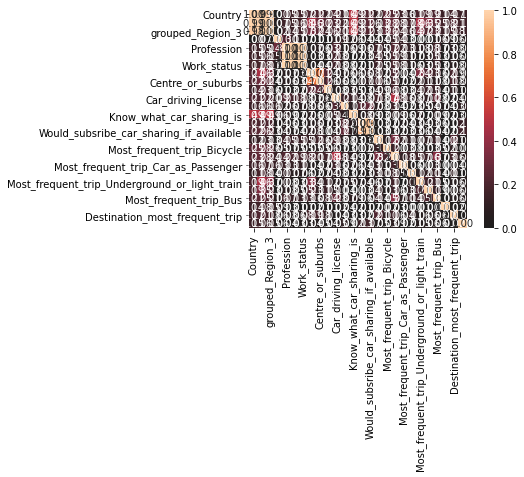

In [24]:
from dython.nominal import associations

confusion_matrix = associations(df2[categorical_cols])

In [25]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
        z=confusion_matrix["corr"][::-1],
        x=categorical_cols,
        y=categorical_cols[::-1],
        #colorscale=''
        ))

fig.update_layout(
    title='Correlation/association of variables',
    height=1200,
    width=1200,
    #xaxis_nticks=36,
    )

fig.show()
filename = "heatmap_cat_vars.html"
save_path = f"{pictures_path}Classification/Heatmaps/{filename}"
fig.write_html(save_path)

In [26]:
confusion_matrix['corr']["Considering_electric_or_hybrid_vehicle_next_purchase"].sort_values(ascending=False)

Considering_electric_or_hybrid_vehicle_next_purchase    1.000000
Would_subsribe_car_sharing_if_available                 0.270936
Would_subsribe_car_sharing_if_available_Attitude        0.224268
Car_driving_license                                     0.213907
Region                                                  0.161389
Country                                                 0.155810
grouped_Region_3                                        0.155754
Most_frequent_trip_Car_as_Driver                        0.142448
Gender                                                  0.116204
Know_what_car_sharing_is                                0.109239
Preference_tolls_or_traffic_limitation                  0.093906
Most_frequent_trip_Walk                                 0.080825
Work_status                                             0.075621
Most_frequent_trip_Bus                                  0.074484
Profession_self_employee                                0.066430
Centre_or_suburbs        

### Binary target

In [29]:
target_variable = "Considering_electric_or_hybrid_vehicle_next_purchase"

In [27]:
dfb = df2.copy()

In [30]:
dfb[target_variable]

0         Maybe yes maybe not
1                Probably not
2               Certainly not
3         Maybe yes maybe not
4                Probably yes
                 ...         
26600    Don't know/no answer
26601    Don't know/no answer
26602     Maybe yes maybe not
26603            Probably yes
26604     Maybe yes maybe not
Name: Considering_electric_or_hybrid_vehicle_next_purchase, Length: 26605, dtype: object

In [31]:
dfb.loc[dfb[target_variable].isin(['Probably yes', 'Certainly yes']), target_variable] = 'YES'
dfb.loc[dfb[target_variable].isin(['Probably not', 'Certainly not']), target_variable] = 'NO'

In [32]:
dfb = dfb[~dfb[target_variable].isin(['Maybe yes maybe not', "Don't know/no answer"])]
dfb

,Country,Region,grouped_Region_3,InternetUsers,Gender,Age,grouped_Age,Profession,Profession_self_employee,Work_status,Location_of_resudence,Centre_or_suburbs,Public_transport_service,Car_driving_license,Number_vehicles_in_household,Household_members,Considering_electric_or_hybrid_vehicle_next_purchase,Know_what_car_sharing_is,Would_subsribe_car_sharing_if_available_Attitude,Would_subsribe_car_sharing_if_available,Most_frequent_trip_Walk,Most_frequent_trip_Bicycle,Most_frequent_trip_Car_as_Driver,Most_frequent_trip_Car_as_Passenger,Most_frequent_trip_Train,Most_frequent_trip_Underground_or_light_train,Most_frequent_trip_Tram,Most_frequent_trip_Bus,Most_frequent_trip_Motorcycle_or_moped,Destination_most_frequent_trip,Min_requency_most_frequent_trip,Max_frequency_most_frequent_trip,Frequency_most_frequent_trip,Frequent_trip_duration_in_minutes,Min_frequent_trip_distance,Max_frequent_trip_distance,Frequent_trip_distance,Preference_tolls_or_traffic_limitation,Education,Income_level,Concern_environmental_impacts
1,France,Pays de la Loire,FRG,71,Male,26,25.0,unemployed,Not Employed,Not Employed,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,3,4,NO,Yes,"Maybe yes, maybe not. I would need to test the...",1,No,No,Yes,No,No,No,No,No,No,"…In an urban area, different from where I live",2.0,3.0,1,20,11.0,20.0,3,Probably more acceptable to limit road traffic,3,0,8
2,Czech Republic,Jihovýchod,CZ0,63,Male,50,49.0,other employed worker,Employee,Employed,Large city (from 250.000 to 1.000.000 inhabita...,in the suburbs,Well served by public transport,Yes,1,4,NO,Yes,No,0,Yes,Yes,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",5.0,7.0,2,20,0.0,3.0,0,No preferences,3,2,6
4,Poland,Pomorskie,PL6,50,Male,36,37.0,manual worker/agricultural worker/farmer,Employee,Employed,Metropolitan area of a big city with more than...,in the suburbs,Well served by public transport,No,1,4,YES,No,"Maybe yes, maybe not. I would need to test the...",1,No,No,No,No,No,No,No,No,Yes,"…In an urban area, same as where I live",5.0,7.0,2,30,11.0,20.0,3,No preferences,2,3,8
6,Hungary,Észak-Magyarország,HU3,57,Male,49,49.0,registered freelance professional,Self Employed,Employed,Small or medium town (less than 250.000 inhabi...,in the suburbs,Difficult to reach with public transport,Yes,2,4,YES,No,Yes,2,No,No,Yes,No,No,No,No,No,No,…It is outside an urban area,5.0,7.0,2,70,50.0,300.0,6,Probably more acceptable to limit road traffic,2,2,5
7,Sweden,Västsverige,SE2,81,Female,39,41.0,teacher/lecturer,Employee,Employed,Small or medium town (less than 250.000 inhabi...,in the centre of the city,Difficult to reach with public transport,Yes,1,3,YES,Yes,Yes,3,No,Yes,No,No,No,No,No,No,No,"…In an urban area, same as where I live",5.0,7.0,2,4,0.0,3.0,0,Definitely more acceptable to pay for less con...,3,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26595,Cyprus,Cyprus,CY,63,Female,46,45.0,middle manager,Employee,Employed,Large city (from 250.000 to 1.000.000 inhabita...,in the suburbs,Relatively served by public transport,Yes,1,2,NO,No,"Maybe yes, maybe not. I would need to test the...",1,No,No,No,Yes,No,No,No,No,No,"…In an urban area, same as where I live",5.0,7.0,2,10,3.0,5.0,1,Probably more acceptable to limit road traffic,3,2,4
26597,Cyprus,Cyprus,CY,63,Male,42,41.0,middle manager,Employee,Employed,Large city (from 250.000 to 1.000.000 inhabita...,in the suburbs,Relatively served by public transport,Yes,2,6,YES,No,"Maybe yes, maybe not. I would need to test the...",1,No,No,Yes,No,No,No,No,No,No,"…In an urban area, same as where I live",5.0,7.0,2,40,6.0,10.0,2,Probably more acceptable to pay for less conge...,3,3,4
26598,Cyprus,Cyprus,CY,63,Female,34,32.5,middle manager,Employee,Employed,Small or medium town (less than 250.000 inhabi...,in the suburbs,Relatively served by public

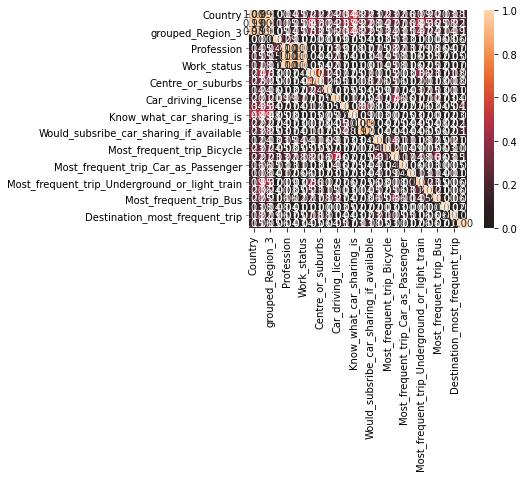

In [33]:
from dython.nominal import associations

confusion_matrix = associations(dfb[categorical_cols])

In [35]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
        z=confusion_matrix["corr"][::-1],
        x=categorical_cols,
        y=categorical_cols[::-1],
        #colorscale=''
        ))

fig.update_layout(
    title='Correlation/association of variables',
    height=1200,
    width=1200,
    #xaxis_nticks=36,
    )

fig.show()
filename = "heatmap_cat_vars_binary_target.html"
save_path = f"{pictures_path}Classification/Heatmaps/{filename}"
fig.write_html(save_path)

In [36]:
confusion_matrix['corr'][target_variable].sort_values(ascending=False)

Considering_electric_or_hybrid_vehicle_next_purchase    1.000000
Region                                                  0.345484
grouped_Region_3                                        0.338265
Country                                                 0.337317
Would_subsribe_car_sharing_if_available_Attitude        0.304294
Would_subsribe_car_sharing_if_available                 0.275068
Preference_tolls_or_traffic_limitation                  0.166874
Location_of_resudence                                   0.118743
Centre_or_suburbs                                       0.109220
Know_what_car_sharing_is                                0.083912
Gender                                                  0.069602
Profession                                              0.069454
Most_frequent_trip_Underground_or_light_train           0.062873
Public_transport_service                                0.052928
Most_frequent_trip_Motorcycle_or_moped                  0.047911
Profession_self_employee 